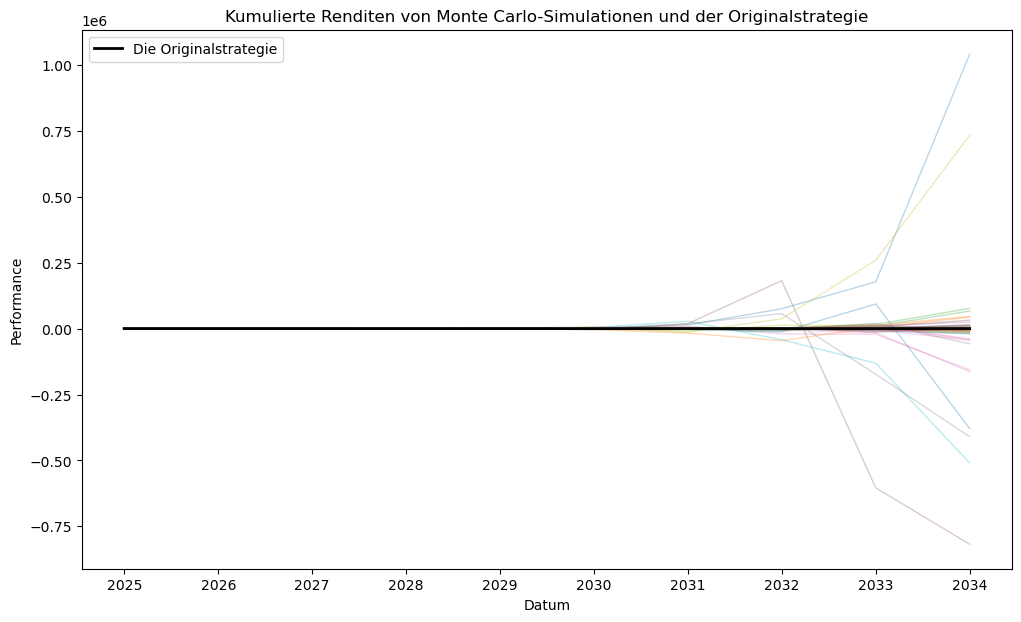

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Annahmen
durchschnitts_rendite = 0.3  # Durchschnittliche jährliche Rendite
standardabweichung = 3.4  # Standardabweichung der Rendite
anfangskapital = 1  # Startwert 1 für die Leistung
simulationen = 100  # Anzahl der Simulationen
jahre = 10  # Zeitspanne

# Erstellen eines Datumsbereichs für die X-Achse
daten = pd.date_range(start="2024", periods=jahre, freq="Y")

# Monte-Carlo-Simulation
pfade = []

for i in range(simulationen):
    # Zufällige jährliche Renditen für jeden Pfad
    zufalls_renditen = np.random.normal(durchschnitts_rendite, standardabweichung, jahre)
    # Kumulierte Rendite berechnen
    pfad = [anfangskapital]
    for rendite in zufalls_renditen:
        pfad.append(pfad[-1] * (1 + rendite))
    pfade.append(pfad)

# Originalstrategie (Hier als geradliniger Trend angenommen)
# Diese sollten durch tatsächliche historische Daten ersetzt werden, falls verfügbar
original_strategie = np.linspace(anfangskapital, anfangskapital * (1 + durchschnitts_rendite) ** jahre, jahre)

# Plot
plt.figure(figsize=(12, 7))
for pfad in pfade:
    plt.plot(daten, pfad[1:], lw=1, alpha=0.3)  # Pfade der Simulationen

plt.plot(daten, original_strategie, 'k-', label='Die Originalstrategie', linewidth=2)  # Originalstrategie

# Verbesserungen für das Diagramm
plt.title('Kumulierte Renditen von Monte Carlo-Simulationen und der Originalstrategie')
plt.xlabel('Datum')
plt.ylabel('Performance')
plt.legend()

# Datumsformatierung
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))

plt.show()
